train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


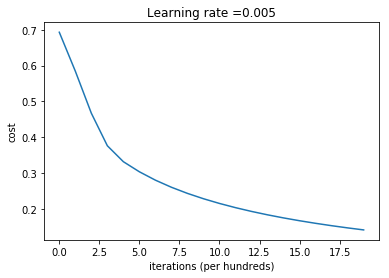

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

#%matplotlib inline
def getOrigData():
	#get data
	train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
	#Reshape to one dimension
	train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
	test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
	#Show info
	print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
	print ("train_set_y shape: " + str(train_set_y.shape))
	print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
	print ("test_set_y shape: " + str(test_set_y.shape))
	print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))
	#Standardize
	train_set_x = train_set_x_flatten/255.
	test_set_x = test_set_x_flatten/255.

	return train_set_x,train_set_y,test_set_x,test_set_y,classes

def showOneImage(index,image_set_x,image_set_y,classes):
	plt.imshow(image_set_x[:,index].reshape((64, 64, 3)))
	print("y = " + str(image_set_y[:, index]) + ", it's a '" + classes[np.squeeze(image_set_y[:, index])].decode("utf-8") +  "' picture.")
	plt.show()

def sigmoid(z):
	s = 1 / (1 + np.exp(-z))
	return s

def initializeParams(dim):
	#dim = numLength,1=outputNum
	w = np.zeros((dim,1))
	b = 0
	assert(w.shape == (dim, 1))
	assert(isinstance(b, float) or isinstance(b, int))
	return w,b

def doPropagation(w,b,X,Y):
	m = X.shape[1]
	z = np.dot(w.T,X)+b
	A = sigmoid(z)
	cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
	dw = 1 / m * np.dot(X, (A - Y).T)
	db = 1 / m * np.sum(A - Y)
	cost = np.squeeze(cost)
	assert(dw.shape == w.shape)
	assert(db.dtype == float)
	assert(cost.shape == ())

	grids = {
	'dw':dw,
	'db':db
	}
	return grids,cost

def learnParams(w,b,X,Y,learn_times,learning_rate,show_flag=True):
	costs = []
	for i in range(learn_times):
		grids,cost = doPropagation(w,b,X,Y)

		w = w - learning_rate*grids['dw']
		b = b - learning_rate*grids['db']

		if i%100 == 0:
			costs.append(cost)
			if show_flag:
				print("Cost after iteration %i: %f" %(i, cost) )
	params ={'w':w,'b':b}

	return params,grids,costs

def predict(w,b,X):
	m = X.shape[1]
	y_predict = np.zeros((1,m))
	A = sigmoid(np.dot(w.T,X)+b)
	y_predict[A>0.5] = 1
	y_predict[A<=0.5] = 0
	assert(y_predict.shape == (1, m))
	return y_predict

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
	#init
	dim = X_train.shape[0]
	w,b = initializeParams(dim)

	params,grids,costs = learnParams(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)

	w = params['w']
	b = params['b']
	Y_prediction_test = predict(w, b, X_test)
	Y_prediction_train = predict(w, b, X_train)

	print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
	print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

	d = {"costs": costs,
		"Y_prediction_test": Y_prediction_test, 
		"Y_prediction_train" : Y_prediction_train, 
		"w" : w, 
		"b" : b,
		"learning_rate" : learning_rate,
		"learn_times": num_iterations}

	if print_cost:
		costs = np.squeeze(d['costs'])
		plt.plot(costs)
		plt.ylabel('cost')
		plt.xlabel('iterations (per hundreds)')
		plt.title("Learning rate =" + str(d["learning_rate"]))
		plt.show()
	return d

train_set_x,train_set_y,test_set_x,test_set_y,classes = getOrigData()
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

In [30]:
test_set_x

array([[ 0.61960784,  0.45098039,  1.        , ...,  0.16078431,
         0.07058824,  0.52156863],
       [ 0.40784314,  0.43137255,  0.99215686, ...,  0.18431373,
         0.07058824,  0.63921569],
       [ 0.3254902 ,  0.43529412,  0.99607843, ...,  0.32941176,
         0.0627451 ,  0.29411765],
       ..., 
       [ 0.67843137,  0.67058824,  0.52156863, ...,  0.71764706,
         0.56470588,  0.01960784],
       [ 0.50196078,  0.69019608,  0.39607843, ...,  0.55294118,
         0.5372549 ,  0.08627451],
       [ 0.43137255,  0.72941176,  0.4745098 , ...,  0.45490196,
         0.42352941,  0.01960784]])

In [12]:
w,b = initializeParams(dim)

TypeError: data type not understood